# EDA
- In this motebook, I just look at the data, statistics, patterns
- I write down some insights at the end of this notebook

### imports

In [1]:
import polars as pl
from polars import col as c
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import holidays

### constants

In [2]:
DATA_DIR = "dataset"
US_HOLIDAYS = holidays.US()  # this is a dict-like object

### data

In [3]:
path = os.path.join("../", DATA_DIR, "train.csv")
train = pl.read_csv(path).with_columns(
    c("pickup_date").str.to_datetime("%Y-%m-%d %H:%M:%S")
)
path = os.path.join("../", DATA_DIR, "validation.csv")
validation = pl.read_csv(path).with_columns(
    c("pickup_date").str.to_datetime("%Y-%m-%d %H:%M:%S")
)
train.sample()

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
f64,f64,str,f64,datetime[μs],str,str
4.688,207.595,"""MKPFX""",9726.7,2021-02-03 10:42:00,"""SZJLZ""","""NTODX"""


### statistics

In [4]:
train.null_count()

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
u32,u32,u32,u32,u32,u32,u32
0,0,0,80,0,0,0


In [5]:
train.describe()

statistic,rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
str,f64,f64,str,f64,str,str,str
"""count""",296727.0,296727.0,"""296727""",296647.0,"""296727""","""296727""","""296727"""
"""null_count""",0.0,0.0,"""0""",80.0,"""0""","""0""","""0"""
"""mean""",5.221752,454.873515,null,23157.860583,"""2021-04-30 19:34:42.478278""",null,null
"""std""",2.979281,447.267275,null,12562.164968,null,null,null
"""min""",1.2884,24.7801,"""GJROY""",4800.95,"""2019-11-10 10:42:00""","""ANCVH""","""ANCVH"""
"""25%""",3.5225,184.7843,null,12433.25,"""2020-08-13 10:42:00""",null,null
"""50%""",4.5741,303.982,null,19050.0,"""2021-05-23 18:42:00""",null,null
"""75%""",6.0186,548.732,null,37755.5,"""2022-01-16 15:42:00""",null,null
"""max""",248.973,2876.4469,"""MKPFX""",190050.0,"""2022-09-05 20:42:00""","""ZYKLC""","""ZYKLC"""


In [75]:
train["transport_type"].value_counts()

transport_type,count
str,u32
"""GJROY""",17604
"""KFEGT""",3375
"""MKPFX""",275748


### graphs

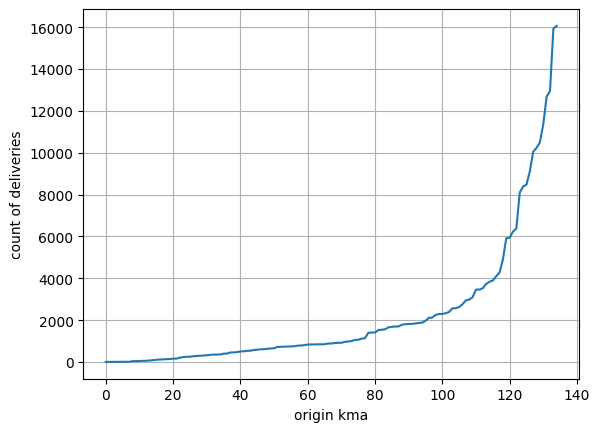

In [76]:
# there are few extremely popular kma
# the rest are rarely used

kma_statistics = train["origin_kma"].value_counts().sort("count")
plt.plot(kma_statistics["count"])
plt.xlabel("origin kma")
plt.ylabel("count of deliveries")
plt.grid()

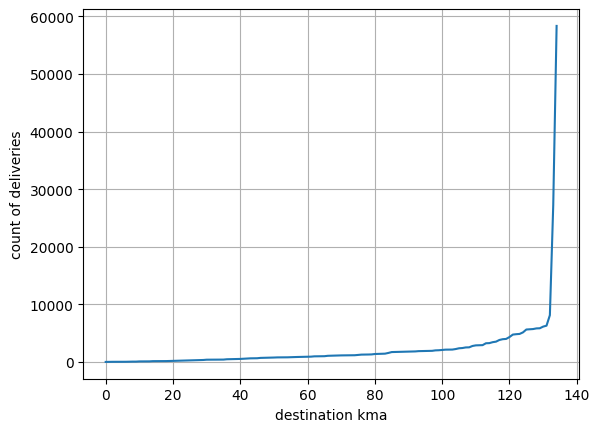

In [77]:
# there are few extremely popular kma
# the rest are rarely used

kma_statistics = train["destination_kma"].value_counts().sort("count")
plt.plot(kma_statistics["count"])
plt.xlabel("destination kma")
plt.ylabel("count of deliveries")
plt.grid()

In [78]:
train.head()

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
f64,f64,str,f64,datetime[μs],str,str
4.7203,521.8451,"""MKPFX""",9231.75,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""
4.9005,532.6675,"""MKPFX""",11754.95,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""
4.7018,523.9188,"""MKPFX""",9603.2,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""
4.6388,562.8296,"""MKPFX""",8789.05,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""
5.0206,519.8782,"""MKPFX""",9597.5,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""


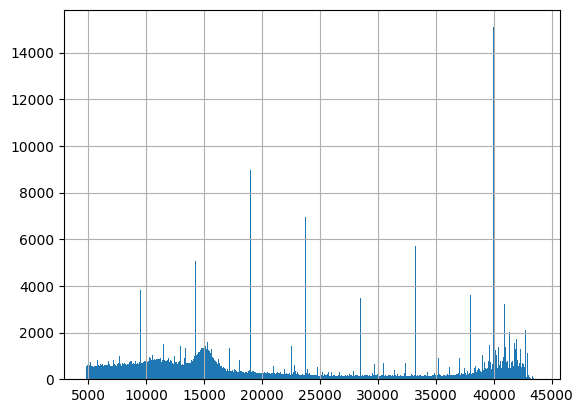

In [79]:
# weight is almost evenly distributed

weight_statistics = train.filter(c("weight") < c("weight").quantile(0.999))
plt.hist(weight_statistics["weight"], bins=500)
plt.grid()

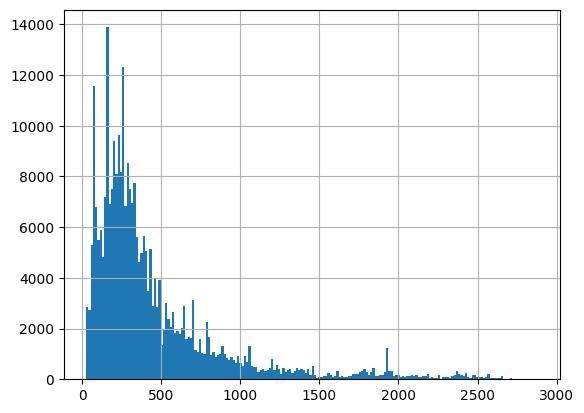

In [80]:
# valid_miles is lognormal

plt.hist(train["valid_miles"], bins=200)
plt.grid()

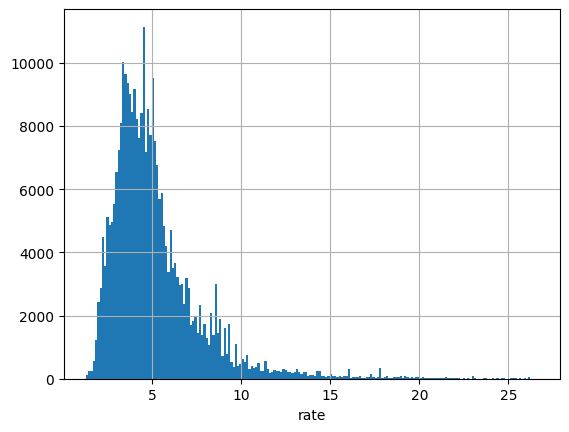

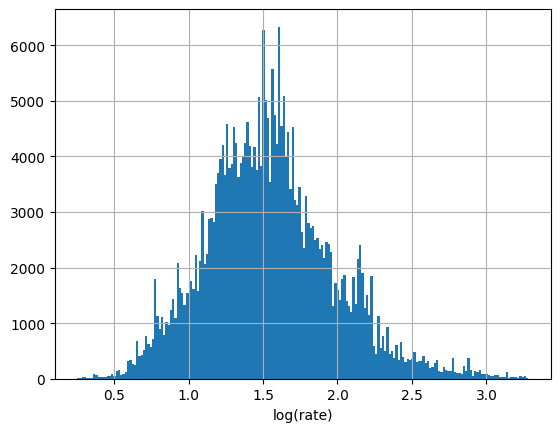

In [81]:
# rate is lognormal

rate_statistics = train.filter(c("rate") < c("rate").quantile(0.999))
plt.hist(rate_statistics["rate"], bins=200)
plt.xlabel("rate")
plt.grid()
plt.show()

# log(rate)

rate_statistics = train.filter(c("rate") < c("rate").quantile(0.999))
plt.hist(rate_statistics["rate"].log(), bins=200)
plt.xlabel("log(rate)")
plt.grid()
plt.show()

### weight
could not find any pretty dependency with weight

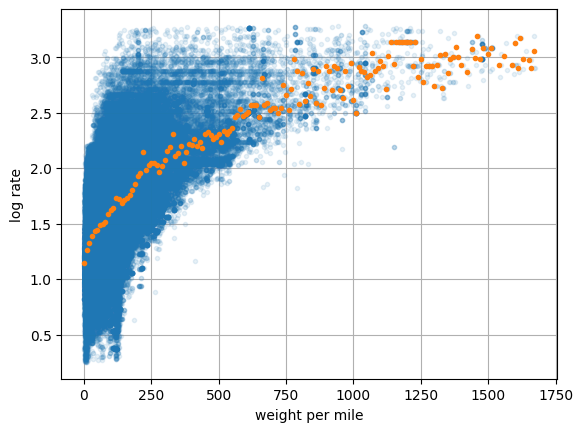

In [82]:
def myround(x, base=10):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    c("weight") < c("weight").quantile(0.999),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="weight_mile",
            values=list(
                map(
                    myround,
                    (
                        weight_rate_stats["weight"] / weight_rate_stats["valid_miles"]
                    ).to_list(),
                )
            ),
        ),
    )
    .group_by("weight_mile")
    .agg(c("rate").median())
    .sort("weight_mile")
)
plt.plot(
    (weight_rate_stats["weight"] / weight_rate_stats["valid_miles"]),
    weight_rate_stats["rate"].log(),
    ".",
    alpha=0.1,
)
plt.plot(
    weight_rate_stats_grouped["weight_mile"],
    weight_rate_stats_grouped["rate"].log(),
    ".",
)
plt.xlabel("weight per mile")
plt.ylabel("log rate")
plt.grid()

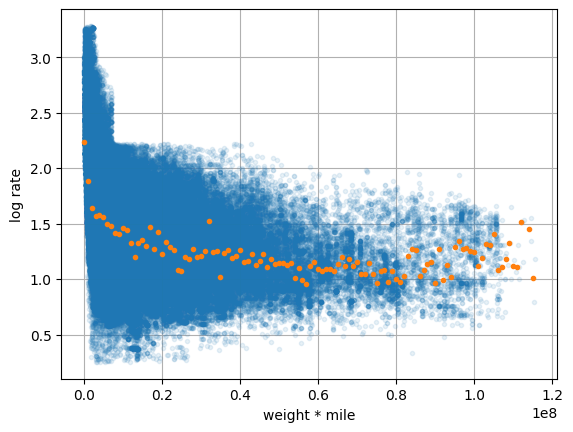

In [83]:
def myround(x, base=1e6):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    c("weight") < c("weight").quantile(0.999),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="weight_mile",
            values=list(
                map(
                    myround,
                    (
                        weight_rate_stats["weight"] * weight_rate_stats["valid_miles"]
                    ).to_list(),
                )
            ),
        ),
    )
    .group_by("weight_mile")
    .agg(c("rate").median())
    .sort("weight_mile")
)
plt.plot(
    (weight_rate_stats["weight"] * weight_rate_stats["valid_miles"]),
    weight_rate_stats["rate"].log(),
    ".",
    alpha=0.1,
)
plt.plot(
    weight_rate_stats_grouped["weight_mile"],
    weight_rate_stats_grouped["rate"].log(),
    ".",
)
plt.xlabel("weight * mile")
plt.ylabel("log rate")
plt.grid()

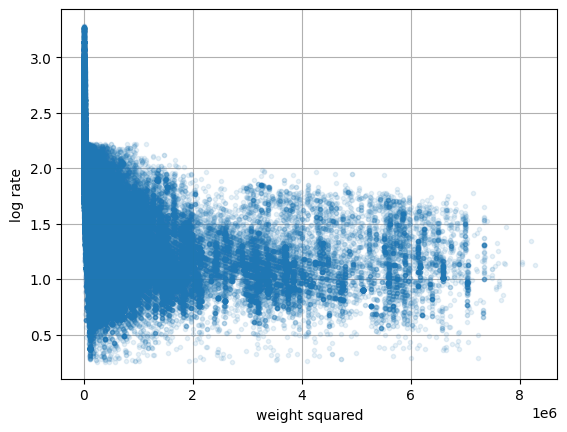

In [85]:
def myround(x, base=1e6):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    c("weight") < c("weight").quantile(0.999),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="weight_mile",
            values=list(
                map(
                    myround,
                    (
                        weight_rate_stats["weight"] * weight_rate_stats["valid_miles"]
                    ).to_list(),
                )
            ),
        ),
    )
    .group_by("weight_mile")
    .agg(c("rate").median())
    .sort("weight_mile")
)
plt.plot(
    (weight_rate_stats["valid_miles"] ** 2),
    weight_rate_stats["rate"].log(),
    ".",
    alpha=0.1,
)

plt.xlabel("weight squared")
plt.ylabel("log rate")
plt.grid()

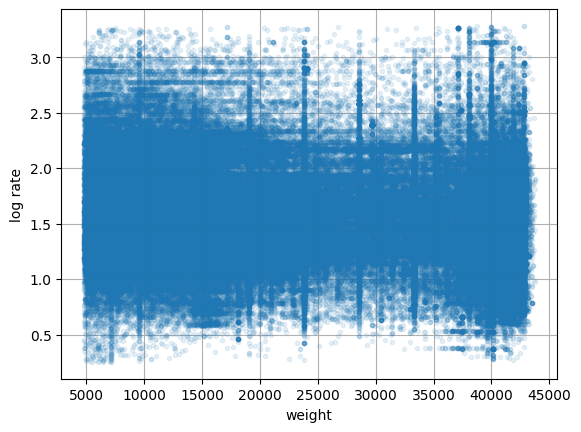

In [86]:
def myround(x, base=500):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    c("weight") < c("weight").quantile(0.999),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="weight",
            values=list(map(myround, weight_rate_stats["weight"].to_list())),
        ),
    )
    .group_by("weight")
    .agg(c("rate").median())
    .sort("weight")
)
plt.plot(weight_rate_stats["weight"], weight_rate_stats["rate"].log(), ".", alpha=0.1)
# plt.plot(weight_rate_stats_grouped["weight"], weight_rate_stats_grouped["rate"], ".")
plt.xlabel("weight")
plt.ylabel("log rate")
plt.grid()

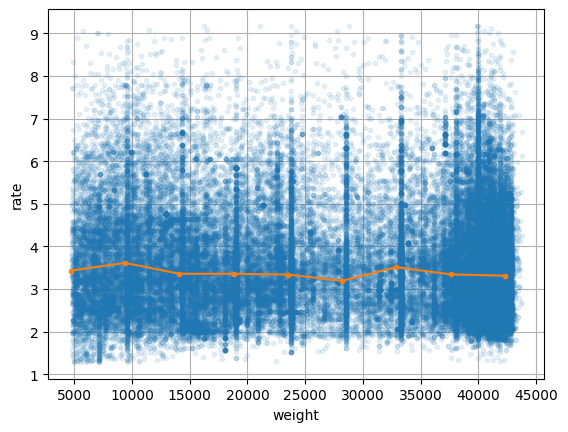

In [44]:
def myround(x, base=4700):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    c("weight") < c("weight").quantile(0.999),
    # c("valid_miles") < 185,
    c("valid_miles") > 550,
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="weight",
            values=list(map(myround, weight_rate_stats["weight"].to_list())),
        ),
    )
    .group_by("weight")
    .agg(c("rate").median())
    .sort("weight")
)
plt.plot(weight_rate_stats["weight"], weight_rate_stats["rate"], ".", alpha=0.1)
plt.plot(weight_rate_stats_grouped["weight"], weight_rate_stats_grouped["rate"], ".-")
plt.xlabel("weight")
plt.ylabel("rate")
plt.grid()

### miles
- there is unusual dependency between miles count and rate
- however I cannot explain different rates for the same number of miles (same kma track)

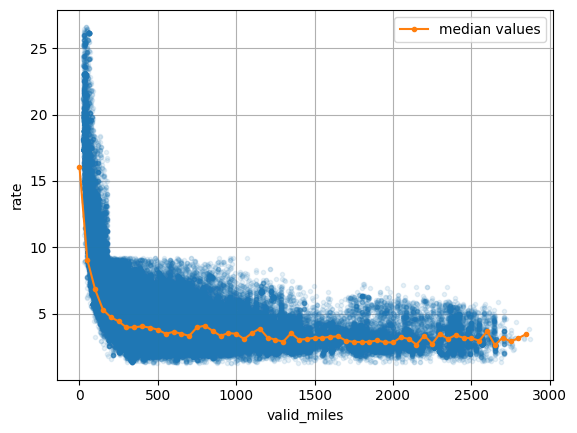

In [164]:
def myround(x, base=50):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    # c("weight") < c("valid_miles").quantile(0.999),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="valid_miles",
            values=list(map(myround, weight_rate_stats["valid_miles"].to_list())),
        ),
    )
    .group_by("valid_miles")
    .agg(c("rate").median())
    .sort("valid_miles")
)
plt.plot(
    weight_rate_stats["valid_miles"],
    weight_rate_stats["rate"],
    ".",
    alpha=0.1,
)
plt.plot(
    weight_rate_stats_grouped["valid_miles"],
    weight_rate_stats_grouped["rate"],
    ".-",
    label="median values",
)
plt.xlabel("valid_miles")
plt.ylabel("rate")
plt.legend()
plt.grid()

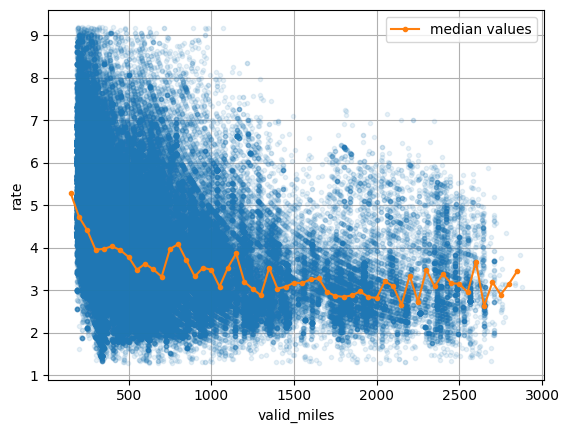

In [171]:
def myround(x, base=50):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    c("valid_miles") > c("valid_miles").quantile(0.25),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="valid_miles",
            values=list(map(myround, weight_rate_stats["valid_miles"].to_list())),
        ),
    )
    .group_by("valid_miles")
    .agg(c("rate").median())
    .sort("valid_miles")
)
plt.plot(
    weight_rate_stats["valid_miles"],
    weight_rate_stats["rate"],
    ".",
    alpha=0.1,
)
plt.plot(
    weight_rate_stats_grouped["valid_miles"],
    weight_rate_stats_grouped["rate"],
    ".-",
    label="median values",
)
plt.xlabel("valid_miles")
plt.ylabel("rate")
plt.legend()
plt.grid()

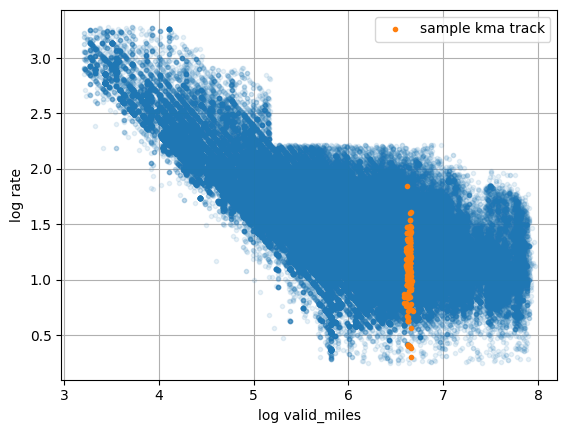

In [88]:
def myround(x, base=50):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    # c("valid_miles") > c("valid_miles").quantile(0.25),
    # c("transport_type") == "GJROY",
    # c("pickup_date") < datetime.strptime("2020-05-01", "%Y-%m-%d"),
    # c("weight") < 12433.25,
)
plt.plot(
    weight_rate_stats["valid_miles"].log(),
    weight_rate_stats["rate"].log(),
    ".",
    alpha=0.1,
)
weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    # c("valid_miles") > c("valid_miles").quantile(0.25),
    # c("transport_type") == "GJROY",
    # c("pickup_date") < datetime.strptime("2020-05-01", "%Y-%m-%d"),
    # c("weight") < 7000,
    c("origin_kma") == "QGHCU",
    c("destination_kma") == "MJGXM",
)
plt.plot(
    weight_rate_stats["valid_miles"].log(),
    weight_rate_stats["rate"].log(),
    ".",
    # alpha=0.1,
    label="sample kma track",
)

plt.xlabel("log valid_miles")
plt.ylabel("log rate")
plt.legend()
plt.grid()

### rolling mean rate over kma
- since rate significantly differs for each kma pair, I can use avaraged lag features over each kma pair
- It would be perfect to create an auto regression model for each rolling-mean time-series, to predict future statistics and not use lags

In [90]:
kma_data = train.filter(
    c("rate") < c("rate").quantile(0.999),
).with_columns(
    pl.concat_list("origin_kma", "destination_kma")
    .list.sort()
    .list.join("_")
    .alias("kma_pair"),
)
kma_data.sample()

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma,kma_pair
f64,f64,str,f64,datetime[μs],str,str,str
8.8981,161.7956,"""MKPFX""",15268.05,2020-09-17 05:42:00,"""QUERU""","""XAYQS""","""QUERU_XAYQS"""


In [92]:
rolling_rate = (
    kma_data.with_columns(c("pickup_date").dt.date().alias("date"))
    .group_by("date", "kma_pair", "transport_type")
    .agg(c("rate").mean())
    .sort("date")
    .with_columns(
        c("rate")
        .rolling_mean(window_size=25, center=False)
        .over("kma_pair", "transport_type")
        .alias("rolling_rate"),
    )
    .with_columns(
        c("rolling_rate")
        .shift(22)
        .over("kma_pair", "transport_type")
        .alias("shift_28_median_week_rate"),
    )
)

In [94]:
rolling_rate.sample()

date,kma_pair,transport_type,rate,rolling_rate,shift_28_median_week_rate
date,str,str,f64,f64,f64
2021-04-19,"""DNDBK_KWGZQ""","""MKPFX""",3.5295,3.5295,3.5295


In [105]:
kma_data = (
    kma_data.with_columns(c("pickup_date").dt.date().alias("date"))
    .join(
        rolling_rate,
        on=["kma_pair", "date", "transport_type"],
        how="left",
    )
    .drop_nulls()
)

In [106]:
kma_data.select("rate", "shift_28_median_week_rate").corr()

rate,shift_28_median_week_rate
f64,f64
1.0,0.844288
0.844288,1.0


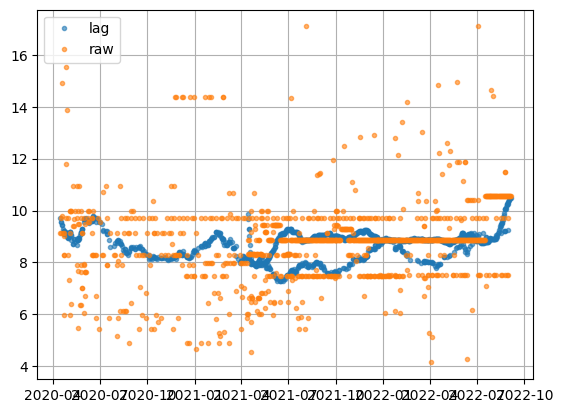

In [108]:
example = kma_data.filter(
    c("kma_pair") == "OIANS_QGHCU",
    # c("transport_type") == "MKPFX",
)

plt.plot(
    example["date"], example["shift_28_median_week_rate"], ".", alpha=0.6, label="lag"
)
plt.plot(example["date"], example["rate"], ".", alpha=0.6, label="raw")
# plt.plot(z[""])
plt.legend()
plt.grid()

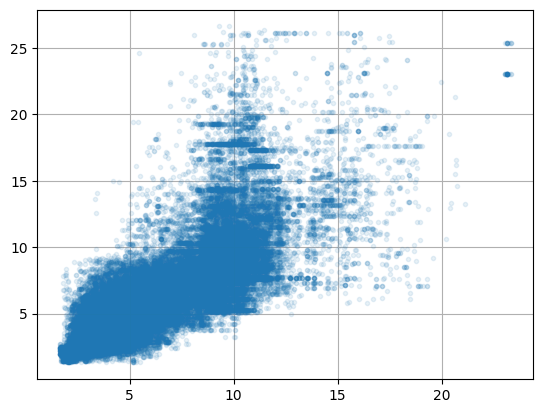

In [109]:
# the dependency is almost linear -> would be a good predictor

plt.plot(sr["shift_28_median_week_rate"], sr["rate"], ".", alpha=0.1)
# plt.plot(z[""])
plt.grid()

### transport_type splits

In [6]:
# 3 transport types, with just 1 predominant
train["transport_type"].value_counts()

transport_type,count
str,u32
"""GJROY""",17604
"""KFEGT""",3375
"""MKPFX""",275748


In [7]:
transport_types = ["MKPFX", "GJROY", "KFEGT"]

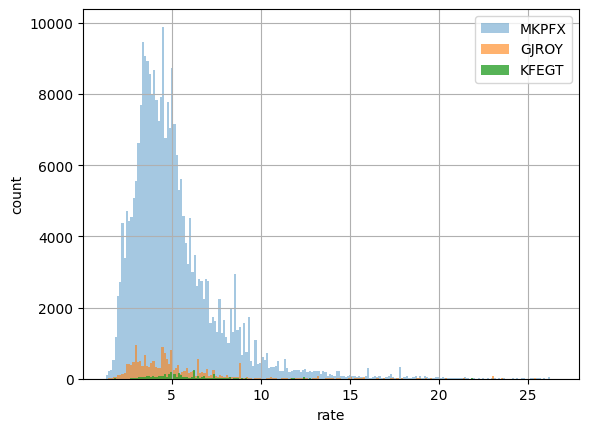

In [112]:
for i, transport_type in enumerate(transport_types):
    plt.hist(
        train.filter(
            c("transport_type") == transport_type,
            c("rate") < c("rate").quantile(0.999),
        )["rate"],
        bins=200,
        alpha=0.4 + i * 0.2,
        label=transport_type,
    )
plt.xlabel("rate")
plt.ylabel("count")
plt.legend()
plt.grid()

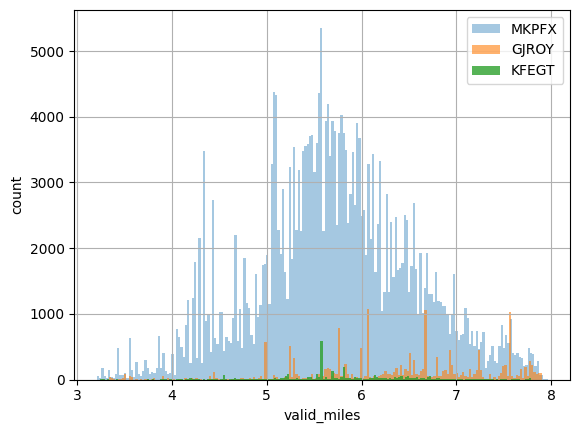

In [113]:
for i, transport_type in enumerate(transport_types):
    plt.hist(
        train.filter(
            c("transport_type") == transport_type,
            # c("rate") < c("rate").quantile(0.999),
        )["valid_miles"].log(),
        bins=200,
        alpha=0.4 + i * 0.2,
        label=transport_type,
    )
plt.xlabel("valid_miles")
plt.ylabel("count")
plt.legend()
plt.grid()

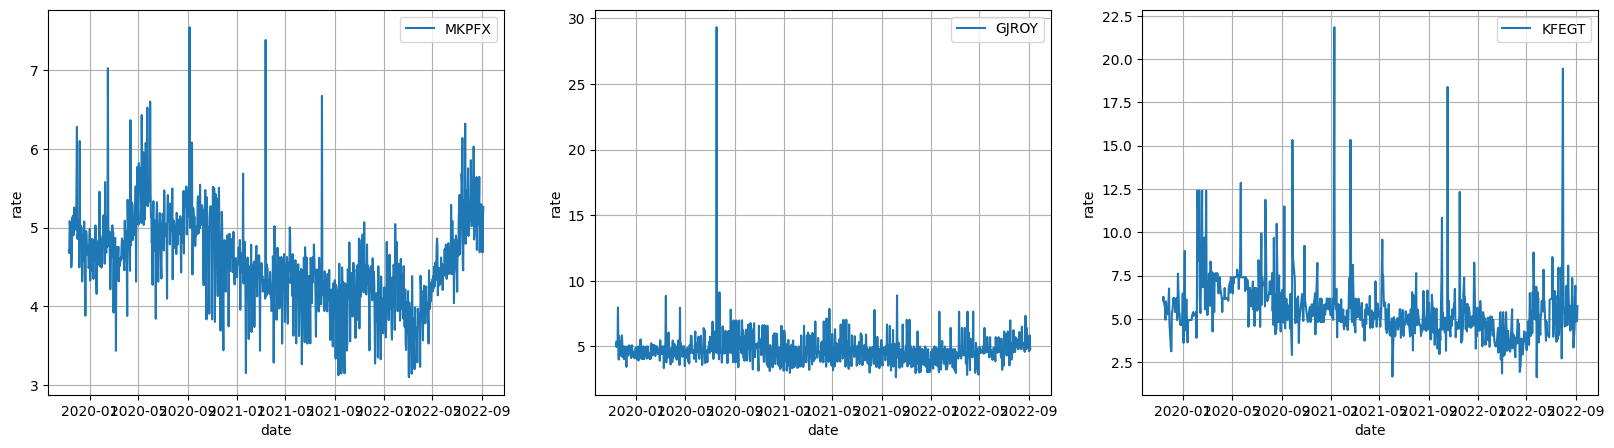

In [10]:
size = len(transport_types)
fig, ax = plt.subplots(1, size, figsize=(20, 5))

for i, transport_type in enumerate(transport_types):
    k = (
        train.filter(
            c("transport_type") == transport_type,
            # c("rate") < c("rate").quantile(0.999),
        )
        .with_columns(c("pickup_date").dt.date().alias("date"))
        .group_by("date")
        .agg(c("rate").median())
        .sort("date")
    )
    ax[i].plot(
        k["date"],
        k["rate"],
        label=transport_type,
    )
    ax[i].set_xlabel("date")
    ax[i].set_ylabel("rate")
    ax[i].legend()
    ax[i].grid()

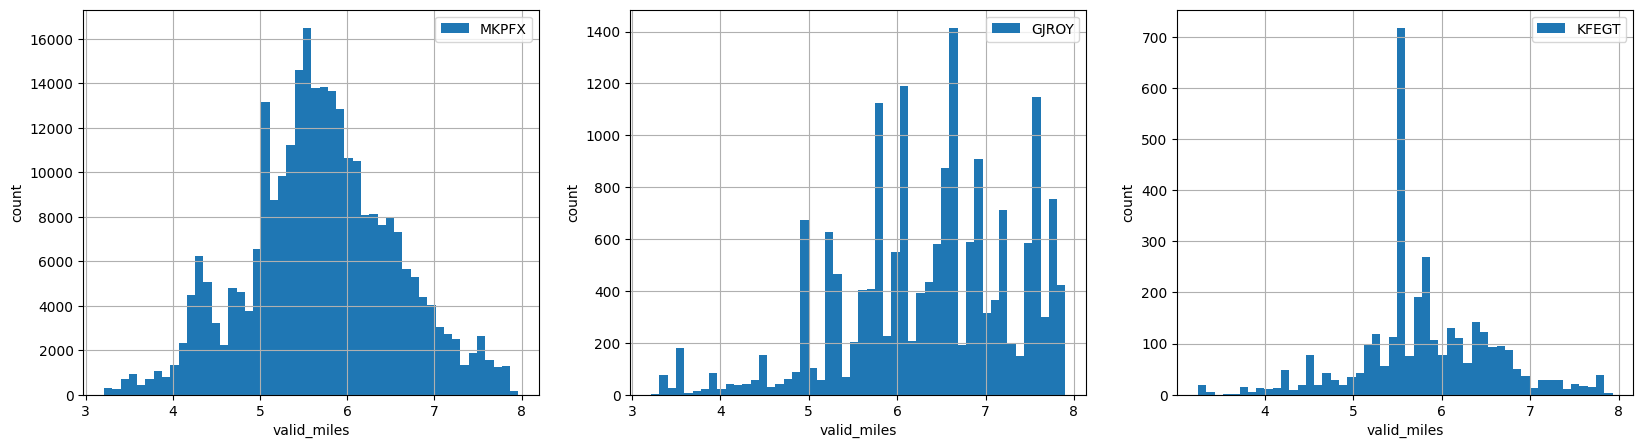

In [115]:
size = len(transport_types)
fig, ax = plt.subplots(1, size, figsize=(20, 5))

for i, transport_type in enumerate(transport_types):
    ax[i].hist(
        train.filter(
            c("transport_type") == transport_type,
            # c("rate") < c("rate").quantile(0.999),
        )["valid_miles"].log(),
        bins=50,
        label=transport_type,
    )
    ax[i].set_xlabel("valid_miles")
    ax[i].set_ylabel("count")
    ax[i].legend()
    ax[i].grid()

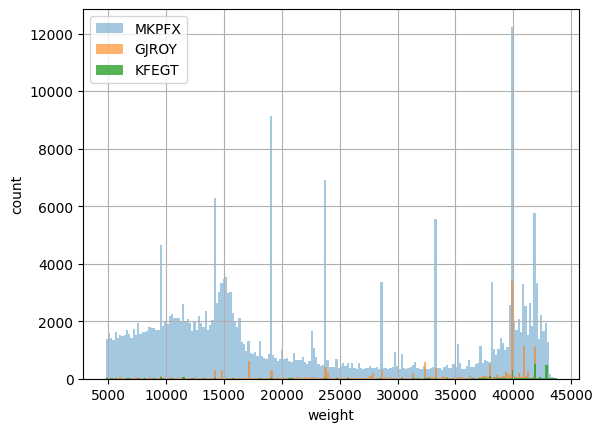

In [116]:
for i, transport_type in enumerate(transport_types):
    plt.hist(
        train.filter(
            c("transport_type") == transport_type,
            c("weight") < c("weight").quantile(0.999),
        )["weight"],
        bins=200,
        alpha=0.4 + i * 0.2,
        label=transport_type,
    )
plt.xlabel("weight")
plt.ylabel("count")
plt.legend()
plt.grid()

### kma

In [113]:
kma_statistics = train.group_by("destination_kma").agg(
    c("valid_miles").median(),
    c("rate").median(),
    c("weight").median(),
)

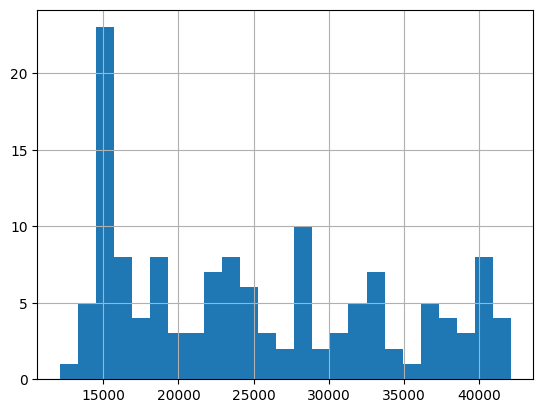

In [114]:
plt.hist(kma_statistics["weight"], bins=25)
plt.grid()

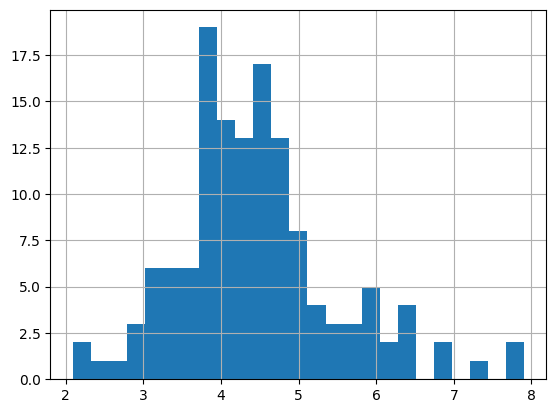

In [115]:
plt.hist(kma_statistics["rate"], bins=25)
plt.grid()

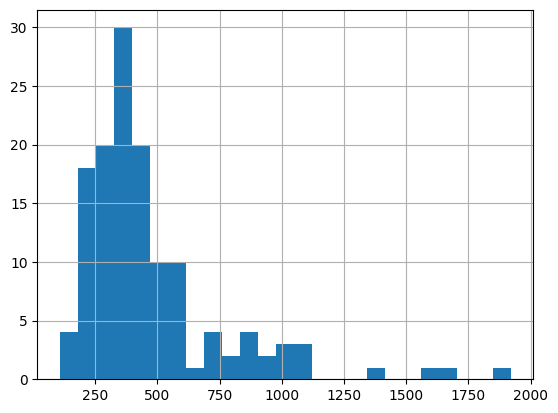

In [116]:
plt.hist(kma_statistics["valid_miles"], bins=25)
plt.grid()

### time

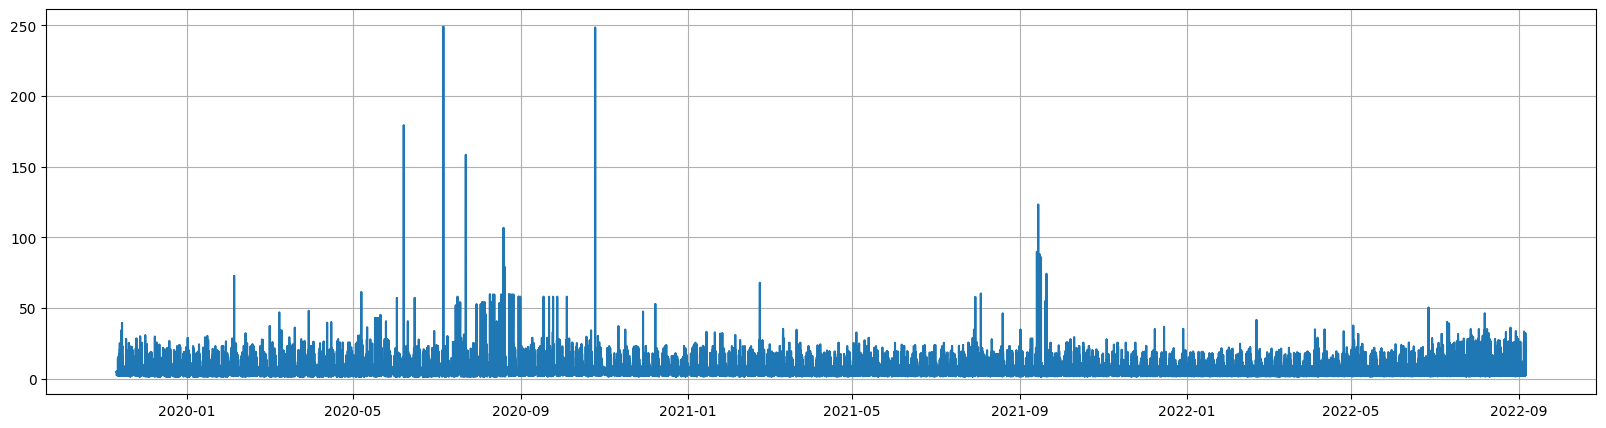

In [107]:
train.sample(3)
plt.figure(figsize=(20, 5))
plt.plot(
    train["pickup_date"],
    train["rate"],
)
plt.grid()

In [136]:
train = train.with_columns(
    c("pickup_date").dt.hour().alias("hour"),
    c("pickup_date").dt.month().alias("month"),
    c("pickup_date").dt.weekday().alias("weekday"),
)

In [143]:
stats_by_weekday = (
    train.group_by("weekday")
    .agg(
        c("valid_miles").median(),
        c("valid_miles").count().alias("count_samples"),
        c("rate").median(),
        c("weight").median(),
    )
    .sort("weekday")
)
stats_by_weekday

weekday,valid_miles,count_samples,rate,weight
i8,f64,u32,f64,f64
1,302.113,56723,4.6149,19050.0
2,302.469,54610,4.5974,19050.0
3,279.418,56269,4.6569,18477.15
4,308.343,59630,4.5025,19050.0
5,503.876,13548,4.3507,23800.0
6,319.9931,5210,4.5741,16401.4
7,305.05,50737,4.5741,19050.0


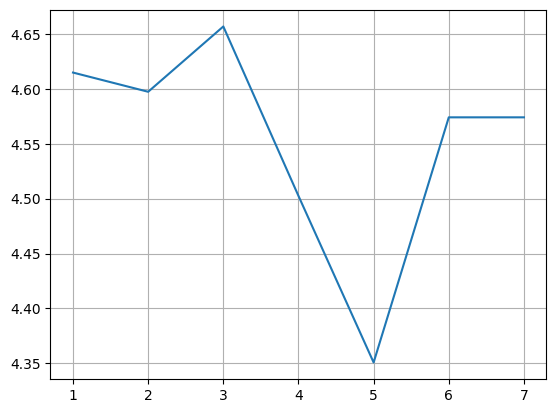

In [144]:
train.sample(3)
# plt.figure(figsize=(20, 5))
plt.plot(
    stats_by_weekday["weekday"],
    stats_by_weekday["rate"],
)
plt.grid()

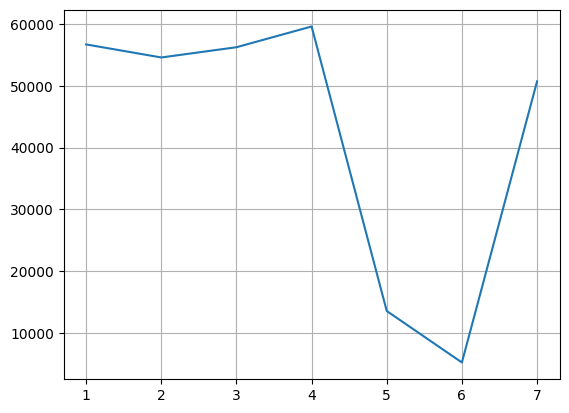

In [145]:
train.sample(3)
# plt.figure(figsize=(20, 5))
plt.plot(
    stats_by_weekday["weekday"],
    stats_by_weekday["count_samples"],
)
plt.grid()

### lag for all rate

In [117]:
train = train.with_columns(
    c("pickup_date").dt.hour().alias("hour"),
    c("pickup_date").dt.month().alias("month"),
    c("pickup_date").dt.weekday().alias("weekday"),
    c("pickup_date").dt.week().alias("week"),
    c("pickup_date").dt.year().alias("year"),
    c("pickup_date").dt.date().alias("date"),
)
train.sample(1)

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma,hour,month,weekday,week,year,date
f64,f64,str,f64,datetime[μs],str,str,i8,i8,i8,i8,i32,date
3.2816,283.779,"""MKPFX""",18473.35,2020-08-09 10:42:00,"""ZSZDM""","""QUERU""",10,8,7,32,2020,2020-08-09


In [118]:
rolling_rate = (
    train.group_by("date")
    .agg(c("rate").mean())
    .sort("date")
    .with_columns(
        c("rate").rolling_mean(window_size=7, center=False).alias("rolling_rate")
    )
    .with_columns(c("rolling_rate").shift(28).alias("shift_28_median_week_rate"))
)

In [119]:
example = train.join(
    rolling_rate.select("date", "shift_28_median_week_rate"),
    on="date",
    how="left",
).filter(c("rate") < 40)

In [120]:
example.select("rate", "shift_28_median_week_rate").drop_nulls().corr()

rate,shift_28_median_week_rate
f64,f64
1.0,0.15698
0.15698,1.0


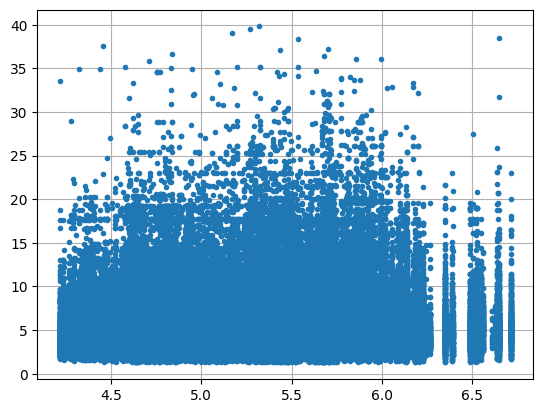

In [122]:
# seems like it is worse than lag over kma pairs
plt.plot(example["shift_28_median_week_rate"], example["rate"], ".")
plt.grid()

### holidays

the ride takes less than two days

New York, NY, USA
Los Angeles, CA, USA
Drive
40h 53m (2,796 mi)


In [123]:
train = train.with_columns(
    c("pickup_date")
    .dt.date()
    .map_elements(
        function=lambda x: 1 if x in US_HOLIDAYS else 0,
        return_dtype=pl.Int64,
    )
    .alias("is_holiday")
)

In [323]:
def is_holiday_next_days(x):
    if x + timedelta(days=1) in US_HOLIDAYS:
        return 1
    elif x + timedelta(days=2) in US_HOLIDAYS:
        return 1
    elif x + timedelta(days=3) in US_HOLIDAYS:
        return 1
        # elif x + timedelta(days=4) in US_HOLIDAYS:
        #     return 1
        # elif x + timedelta(days=5) in US_HOLIDAYS:
        #     return 1
        # elif x + timedelta(days=6) in US_HOLIDAYS:
        return 1
    else:
        return 0

In [324]:
train = train.with_columns(
    c("pickup_date")
    .dt.date()
    .map_elements(
        function=is_holiday_next_days,
        return_dtype=pl.Int64,
    )
    .alias("is_holiday_next_week")
)

In [325]:
train["is_holiday_next_week"].value_counts()

is_holiday_next_week,count
i64,u32
1,22465
0,274262


In [326]:
train.group_by("is_holiday_next_week").agg(
    c("rate").mean().alias("mean"),
    c("rate").quantile(0.8).alias("quantile"),
)

is_holiday_next_week,mean,quantile
i64,f64,f64
0,5.230139,6.5714
1,5.119362,6.401


In [ ]:
train.group_by("is_holiday").agg(
    c("rate").mean().alias("mean"),
    c("rate").quantile(0.8).alias("quantile"),
)

is_holiday,mean,quantile
i64,f64,f64
0,5.219875,6.5587
1,5.27132,6.6168


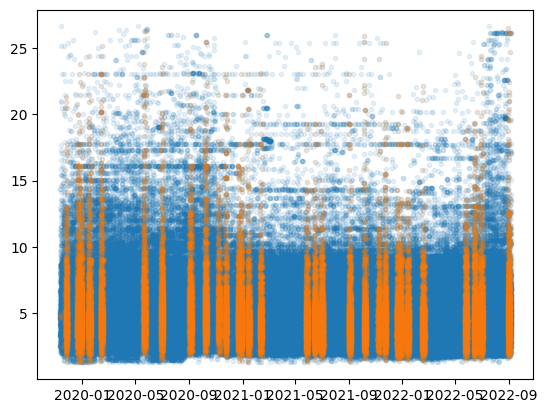

In [ ]:
plt.plot(
    train.filter(
        # c("transport_type") == transport_type,
        c("rate")
        < c("rate").quantile(0.999),
    )["pickup_date"],
    train.filter(
        # c("transport_type") == transport_type,
        c("rate")
        < c("rate").quantile(0.999),
    )["rate"],
    ".",
    alpha=0.1,
)
plt.plot(
    train.filter(
        c("is_holiday_next_week") == 1,
        c("rate") < c("rate").quantile(0.999),
    )["pickup_date"],
    train.filter(
        c("is_holiday_next_week") == 1,
        c("rate") < c("rate").quantile(0.999),
    )["rate"],
    ".",
    alpha=0.1,
)

## insights
- during holidays price is a bit higher (not significant)
- before holidays price is a bit lower (not significant)
- rate and valid_miles are skewed - better to make log()
- prices are stable over time no evident trend
- weight has no influence on rate  (not significant)
- weight per mile and weight*mile might be useful  (not significant)
- the best predictor is lag over kma routes and transport types
- lag over common rate values is much worse
- there are 3 transport types, with just 1 predominant. The distributions of other feature over transport types are similar
-  KMAs are quite different in frequency of orders, it might be useful to add demand feature for each kma